In [1]:
!pip install tqdm


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [9]:
!pip install nltk
!pip install trnlp


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 12.5 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
  Created wheel for trnlp: filename=trnlp-0.2.3a0-py3-none-any.whl size=10168280 sha256=43a6ee7cef781024a3c3159deba6b015b7b746a002a342cb6437eadb669f5f75
  Stored in directory: /Users/gulbahar/Library/Caches/pip/wheels/3e/3c/90/dfcf2e7c9a5620e2b8b146292ebc87cc8aab8c74c633a54dd2
Successfully built trnlp

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install spacy


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sns
import re
import numpy as np
from tqdm.notebook import tqdm
import nltk
from tqdm.notebook import tqdm
tqdm.pandas()
import spacy
from trnlp import TrnlpWord

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

In [23]:
df_es = pd.read_csv('./jigsaw-toxic-comment-train-google-es.csv')
df_tr = pd.read_csv('./jigsaw-toxic-comment-train-google-tr.csv')
df_fr = pd.read_csv('./jigsaw-toxic-comment-train-google-fr.csv')
df_it = pd.read_csv('./jigsaw-toxic-comment-train-google-it.csv')
df_pt = pd.read_csv('./jigsaw-toxic-comment-train-google-pt.csv')
df_ru = pd.read_csv('./jigsaw-toxic-comment-train-google-ru.csv')

In [24]:
df_es['language']='spanish'
df_fr['language']='french'
df_it['language']='italian'
df_pt['language']='portuguese'
df_ru['language']='russian'
df_tr['language']='turkish'

In [25]:
df_tr

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,language
0,0,0001d958c54c6e35,"Sen, efendim, benim kahramanımsın. Hangi sayfa...",0,0,0,0,0,0,turkish
1,1,0002bcb3da6cb337,KADIN ÇALIŞMAYA ÇALIŞMADAN ÖNCE COCKSUCKER,1,0,0,0,0,0,turkish
2,2,00070ef96486d6f9,"Oh, ve yukarıdaki kız benimle tartışmalara baş...",0,0,0,0,0,0,turkish
3,3,000113f07ec002fd,"Hey adamım, gerçekten savaşı düzenlemeye çalış...",0,0,0,0,0,0,turkish
4,4,00173958f46763a2,TFD\n\nSanýrým sadece düţündük. Sanırım birbir...,0,0,0,0,0,0,turkish
...,...,...,...,...,...,...,...,...,...,...
223544,223544,fffac2a094c8e0e2,"MEL GIBSON, SHITTY FİLMLERİ YAPAN NAZI HATTI. ...",1,0,0,0,0,0,turkish
223545,223545,fffb5451268fb5ba,"""\n\n == Unicorn inine keşif ==\n\n Sözde, Kuz...",0,0,0,0,0,0,turkish
223546,223546,fffa8a11c4378854,== hepinize utanç !!! ==\n\n Geylerden bahsetm...,0,0,0,0,0,0,turkish
223547,223547,fff3ae2e177b6bb3,"""\n\n == Aynı kahve dükkanı mı? ==\n\n Hafızam...",0,0,1,0,1,0,turkish


In [26]:
train = pd.concat([
    df_es[['id','comment_text', 'language', 'toxic','severe_toxic','obscene','threat','insult','identity_hate']],
    df_tr[['id','comment_text', 'language', 'toxic','severe_toxic','obscene','threat','insult','identity_hate']],
    df_fr[['id','comment_text', 'language', 'toxic','severe_toxic','obscene','threat','insult','identity_hate']],
    df_pt[['id','comment_text', 'language', 'toxic','severe_toxic','obscene','threat','insult','identity_hate']],
    df_ru[['id','comment_text', 'language', 'toxic','severe_toxic','obscene','threat','insult','identity_hate']],
    df_it[['id','comment_text', 'language', 'toxic','severe_toxic','obscene','threat','insult','identity_hate']]
    
]).reset_index(drop=True)

In [27]:
train

,id,comment_text,language,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,000113f07ec002fd,"Hola hombre, realmente no estoy tratando de ed...",spanish,0,0,0,0,0,0
1,000b08c464718505,"""\n\n Con respecto a tus ediciones recientes\n...",spanish,0,0,0,0,0,0
2,001325b8b20ea8aa,Alabanza\n\nLeí este artículo hace unos 6 mese...,spanish,0,0,0,0,0,0
3,001c557175094f10,"En otras palabras, eres demasiado vago como pa...",spanish,0,0,0,0,0,0
4,00031b1e95af7921,Su vandalismo al artículo de Matt Shirvington ...,spanish,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1341289,fffac2a094c8e0e2,MEL GIBSON È UN CAZZO NAZI CHE FA FILM DI SPET...,italian,1,0,0,0,0,0
1341290,fff9d70fe0722906,== Bastardo fortunato ==\n http://wikimediafou...,italian,0,0,0,0,0,0
1341291,fff8f64043129fa2,": Jerome, vedo che non ti sei mai avvicinato a...",italian,0,0,0,0,0,0
1341292,ffebe90c8d5acaba,"""\n\n == IRAN ==\n Proprio così, l'Iran. Era i...",italian,1,0,1,0,1,0


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341294 entries, 0 to 1341293
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   id             1341294 non-null  object
 1   comment_text   1340101 non-null  object
 2   language       1341294 non-null  object
 3   toxic          1341294 non-null  object
 4   severe_toxic   1341294 non-null  int64 
 5   obscene        1341294 non-null  int64 
 6   threat         1341294 non-null  int64 
 7   insult         1341294 non-null  int64 
 8   identity_hate  1341294 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 92.1+ MB


In [30]:
train.dropna(inplace=True)

In [31]:
train['toxic'] = pd.to_numeric(train['toxic'], errors='coerce')

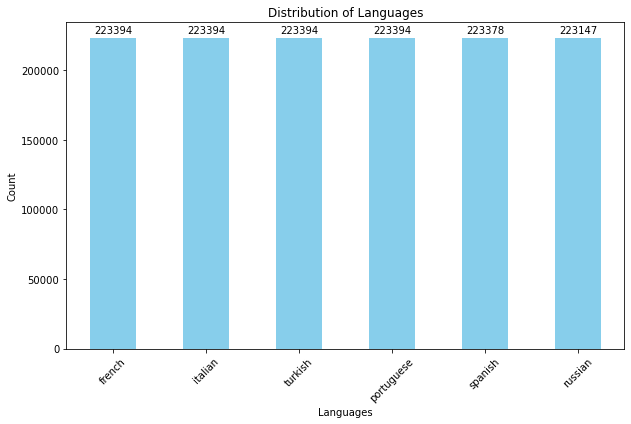

In [37]:
language_counts = train['language'].value_counts()

# Dil dağılımını hesaplayın
language_counts = train['language'].value_counts()

# Çubuk grafik oluşturun
plt.figure(figsize=(10, 6))
bars = language_counts.plot(kind='bar', color='skyblue')

# Her çubuğun üstüne sayısal değerleri ekleyin
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points')

plt.title('Distribution of Languages')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


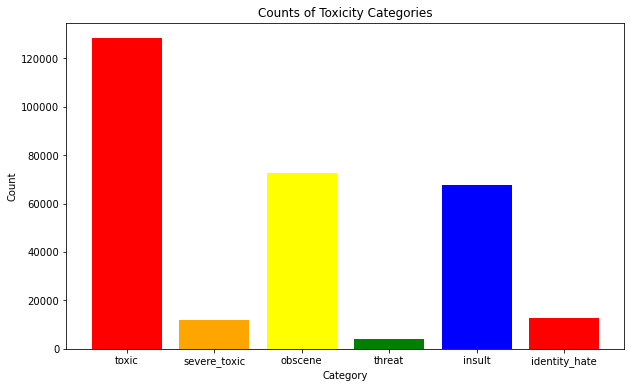

In [48]:
categories = ['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
counts = [train[cat].sum() for cat in categories]

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['red', 'orange', 'yellow', 'green', 'blue'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Toxicity Categories')
plt.show()

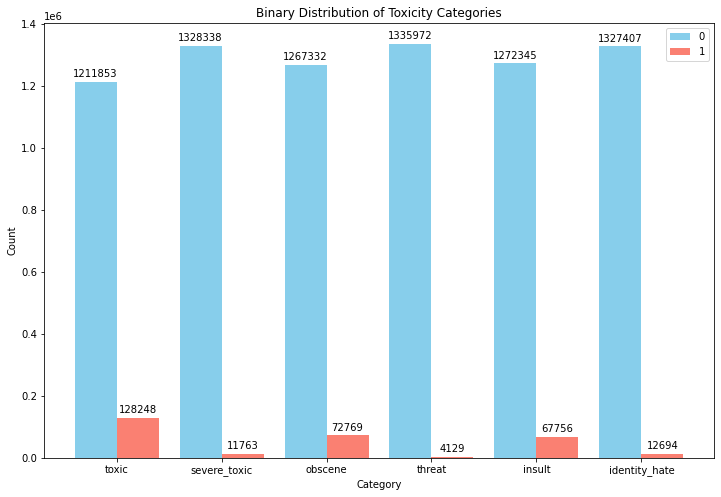

In [36]:


categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Kategoriye göre değer sayımlarını hesaplayın
value_counts = {cat: train[cat].value_counts() for cat in categories}

# Grafik için verileri hazırlayın
counts_0 = [value_counts[cat].get(0, 0) for cat in categories]
counts_1 = [value_counts[cat].get(1, 0) for cat in categories]

# Grafik oluşturun
x = range(len(categories))
bar_width = 0.4

plt.figure(figsize=(12, 8))
bars_0 = plt.bar(x, counts_0, width=bar_width, label='0', color='skyblue', align='center')
bars_1 = plt.bar([p + bar_width for p in x], counts_1, width=bar_width, label='1', color='salmon', align='center')

# Her çubuğun üstüne sayısal değerleri ekleyin
for bar in bars_0:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points')

for bar in bars_1:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Binary Distribution of Toxicity Categories')
plt.xticks([p + bar_width / 2 for p in x], categories)
plt.legend()

plt.show()


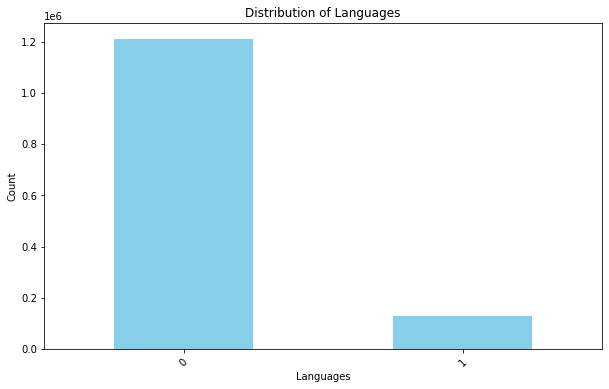

In [32]:
toxic_counts = train['toxic'].value_counts()

plt.figure(figsize=(10, 6))
toxic_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Languages')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [35]:
train['toxic'].value_counts()

0    1211853
1     128248
Name: toxic, dtype: int64

In [53]:
numeric_columns = train.select_dtypes(include=['number']).columns

# Verileri 0.5 eşiğine göre binarize etme
threshold = 0.5
train[numeric_columns] = train[numeric_columns].applymap(lambda x: 1 if x > threshold else 0)


In [54]:
# Define stopwords for all languages in dataset
stopwords_dict = {
    'spanish': set(stopwords.words('spanish')),
    'french': set(stopwords.words('french')),
    'italian': set(stopwords.words('italian')),
    'portuguese': set(stopwords.words('portuguese')),
    'russian': set(stopwords.words('russian')),
    'turkish': set(stopwords.words('turkish'))
}

In [55]:
# Number of words
train['num_words'] = train['comment_text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Number of capital_letters
train['num_capital_let'] = train['comment_text'].apply(lambda x: len([c for c in str(x) if c.isupper()]) if pd.notnull(x) else 0)

# Number of special characters
train['num_special_char'] = train['comment_text'].str.findall(r'[^a-zA-Z0-9 ]').str.len().fillna(0)

# Number of unique words
train['num_unique_words'] = train['comment_text'].apply(lambda x: len(set(str(x).split())) if pd.notnull(x) else 0)

# Number of numerics
train['num_numerics'] = train['comment_text'].apply(lambda x: sum(c.isdigit() for c in str(x)) if pd.notnull(x) else 0)

# Number of characters
train['num_char'] = train['comment_text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Number of stopwords
train['num_stopwords'] = train.apply(lambda row: 
                                     len([word for word in str(row['comment_text']).lower().split() 
                                          if word in stopwords_dict.get(row['language'], set())]) 
                                     if pd.notnull(row['comment_text']) else 0, axis=1)



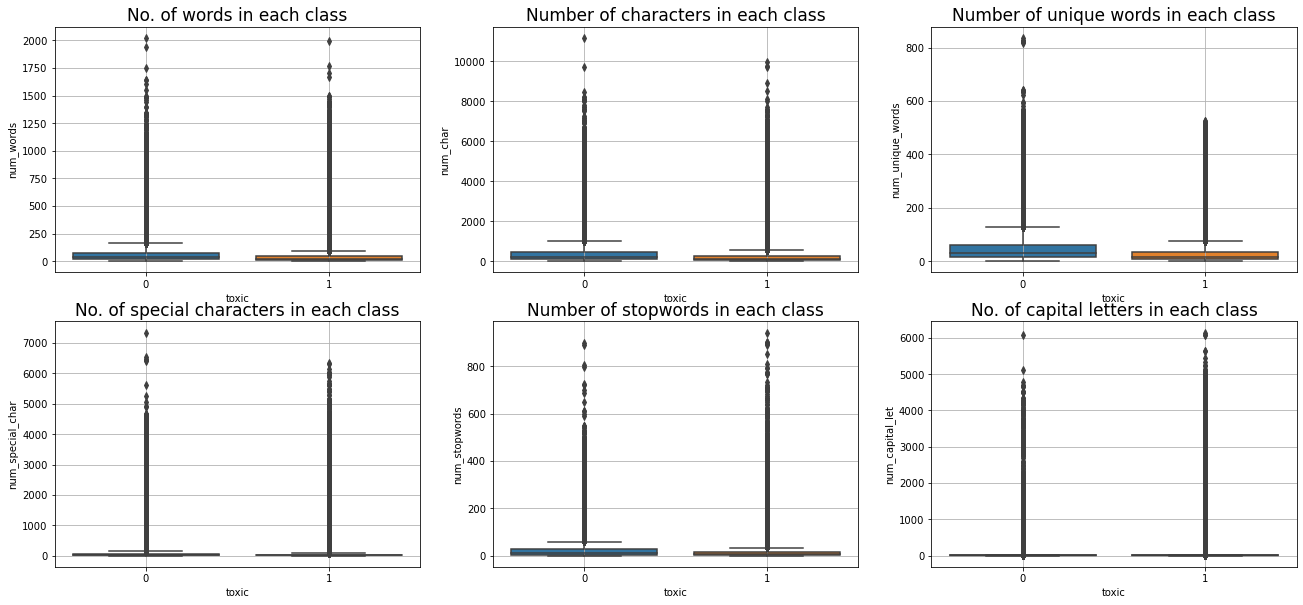

In [56]:
def display_boxplot(_x, _y, _data, _title):
    sns.boxplot(x=_x, y=_y, data=_data)
    plt.grid(True)
    #plt.tick_params(axis='x', which='major', labelsize=15)
    plt.title(_title,fontsize=17)
    plt.xlabel(_x, fontsize=10)

# Boxplot: Number of words
plt.subplot(2, 3, 1)
display_boxplot('toxic', 'num_words', train, 'No. of words in each class')

# Boxplot: Number of chars
plt.subplot(2, 3, 2)
display_boxplot('toxic', 'num_char', train, 'Number of characters in each class')

# Boxplot: Number of unique words
plt.subplot(2, 3, 3)
display_boxplot('toxic', 'num_unique_words', train, 'Number of unique words in each class')

# Boxplot: Number of special characters
plt.subplot(2, 3, 4)
display_boxplot('toxic', 'num_special_char', train, 'No. of special characters in each class')

# Boxplot: Number of stopwords
plt.subplot(2, 3, 5)
display_boxplot('toxic', 'num_stopwords', train, 'Number of stopwords in each class')

# Boxplot: Number of capital letters
plt.subplot(2, 3, 6)
display_boxplot('toxic', 'num_capital_let', train, 'No. of capital letters in each class')


plt.subplots_adjust(right=3.0)
plt.subplots_adjust(top=2.0)
plt.show()

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340101 entries, 0 to 1341293
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   id                1340101 non-null  object
 1   comment_text      1340101 non-null  object
 2   language          1340101 non-null  object
 3   toxic             1340101 non-null  int64 
 4   severe_toxic      1340101 non-null  int64 
 5   obscene           1340101 non-null  int64 
 6   threat            1340101 non-null  int64 
 7   insult            1340101 non-null  int64 
 8   identity_hate     1340101 non-null  int64 
 9   num_words         1340101 non-null  int64 
 10  num_capital_let   1340101 non-null  int64 
 11  num_special_char  1340101 non-null  int64 
 12  num_unique_words  1340101 non-null  int64 
 13  num_numerics      1340101 non-null  int64 
 14  num_char          1340101 non-null  int64 
 15  num_stopwords     1340101 non-null  int64 
dtypes: int64(13), obje

In [24]:
data_cleaned = train.drop(columns=['num_words', 'num_capital_let','num_special_char','num_unique_words','num_numerics','num_char','num_stopwords'])
data_cleaned.head()

,id,comment_text,language,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,000113f07ec002fd,Hola hombre realmente tratando editar guerra. ...,spanish,0,0,0,0,0,0
1,000b08c464718505,respecto ediciones recientes vez más lea WP F...,spanish,0,0,0,0,0,0
2,001325b8b20ea8aa,Alabanza Leí artículo hace 6 meses. mejor.,spanish,0,0,0,0,0,0
3,001c557175094f10,palabras demasiado vago señalar algo. cambie e...,spanish,0,0,0,0,0,0
4,00031b1e95af7921,vandalismo artículo Matt Shirvington sido reve...,spanish,0,0,0,0,0,0
